# Sobre o conjunto de dados
<span style="font-size15ptr;">Declaração do problema
A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA estabelecendo lá a sua unidade de produção e produzindo carros localmente para dar concorrência aos seus homólogos dos EUA e da Europa.

Eles contrataram uma empresa de consultoria automotiva para entender os fatores dos quais depende o preço dos carros. Especificamente, pretendem compreender os factores que afectam os preços dos automóveis no mercado americano, uma vez que estes podem ser muito diferentes dos do mercado chinês. A empresa quer saber:

Quais variáveis ​​são significativas na previsão do preço de um carro
Quão bem essas variáveis ​​descrevem o preço de um carro
Com base em diversas pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros no mercado americano.

# Meta de negócios
Modelar o preço dos carros com as variáveis ​​independentes disponíveis. Esse modelo será utilizado pela administração para entender exatamente como os preços variam com as características dos automóveis. Consequentemente, eles podem manipular o design dos carros, a estratégia de negócios, etc., para atender a determinados níveis de preços. Além disso, o modelo será uma boa forma de a gestão compreender a dinâmica de preços.</span>

**O conjunto de dados usado nesse algoritmo pode ser baixado em : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction**ado.</span>new market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from yellowbrick.regressor import ResidualsPlot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
dados = pd.read_csv('CarPrice_Assignment.csv')
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<span style="font-size:15pt;"> EDA dos conjunto de dados:</span>

In [3]:
caros = dados.sort_values(by = 'price', ascending = False)
caros = caros.head(10)

In [4]:
dados = dados.drop('car_ID',axis=1)

In [5]:
dados.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#VERIFICANDO A FORMATAÇÃO DOS NOMES DOS CARROS
dados['CarName'] = dados['CarName'].str.split(' ').str[0]

In [7]:
dados['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#SUBSTITUINDO OS ERROS DE DIGITAÇÃO
dados['CarName'] = dados['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
dados['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
marca = dados['CarName']


In [11]:
col_categorica = ['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [12]:
dados['fueltype'].isna().sum()

0

Text(0.5, 1.0, 'Preço dos carros')

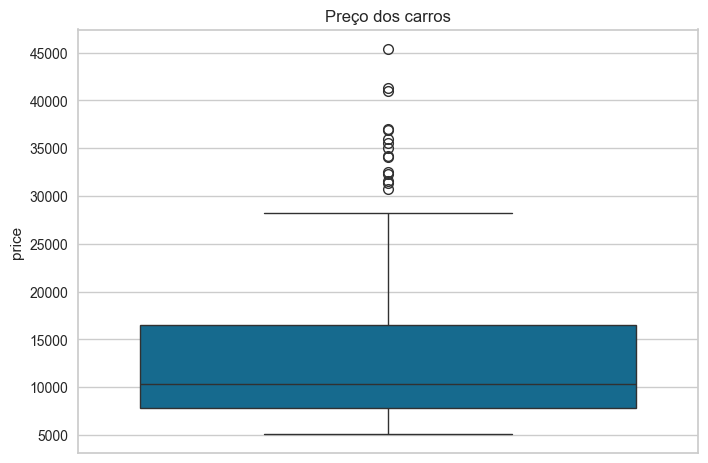

In [13]:
sns.boxplot(dados.price).set_title('Preço dos carros')

Text(0.5, 1.0, 'Marcas mais frequentes')

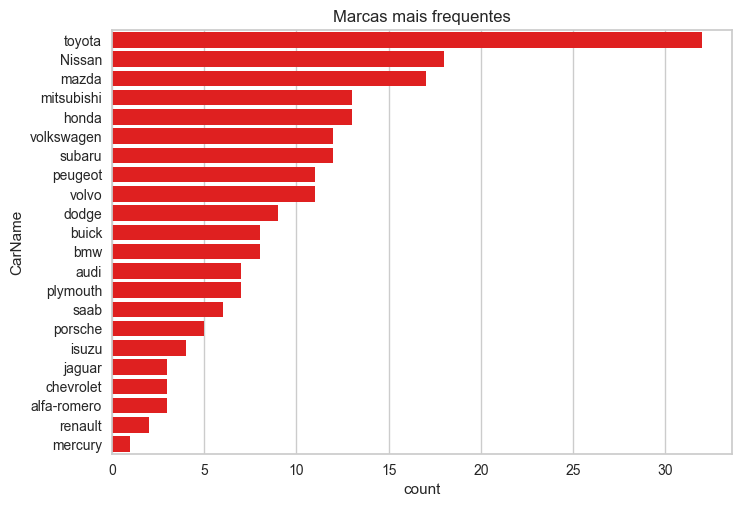

In [14]:
count =marca.value_counts().index
sns.countplot(y = marca, order = count, color = 'red').set_title('Marcas mais frequentes')

Text(0.5, 1.0, 'Proporção de tipos de combustível')

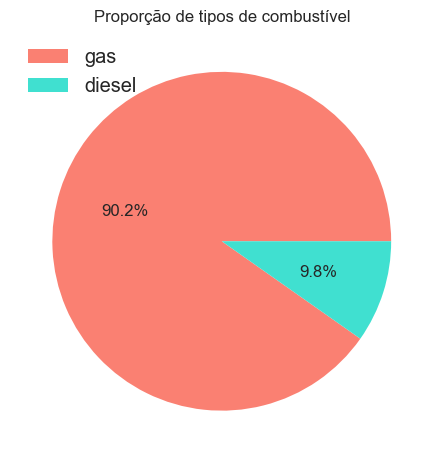

In [15]:
plt.pie(dados['fueltype'].value_counts(), autopct ='%1.1f%%', colors = ['salmon', 'turquoise']) 
plt.legend(dados['fueltype'].unique(), fontsize='large')
plt.title('Proporção de tipos de combustível')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9504\3156645215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dados, x = 'carbody', palette = 'colorblind').set_title('Tipos de carros mais frequentes')


Text(0.5, 1.0, 'Tipos de carros mais frequentes')

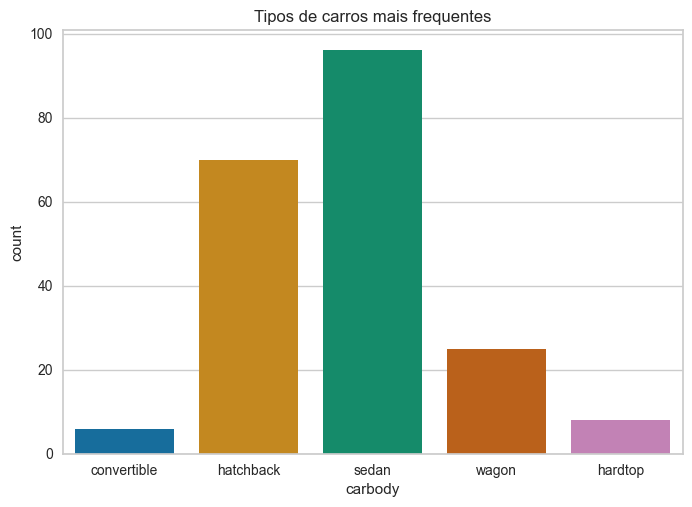

In [16]:
sns.countplot(data = dados, x = 'carbody', palette = 'colorblind').set_title('Tipos de carros mais frequentes')

Text(0.5, 1.0, 'Top 10 carros mais caros')

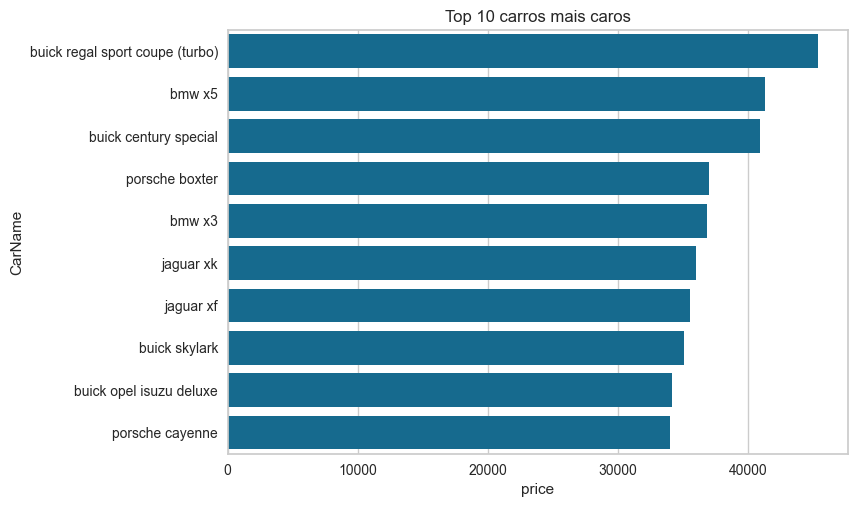

In [17]:
sns.barplot(data = caros, x = 'price', y = 'CarName').set_title('Top 10 carros mais caros')

In [18]:
dados.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
#pegando as colunas numéricas
col_numerica = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [20]:
dados2 = dados[col_numerica]

In [21]:
dados2

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,23,28,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160,19,25,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134,18,23,21485.0
203,109.1,188.8,68.9,3217,145,3.01,106,26,27,22470.0


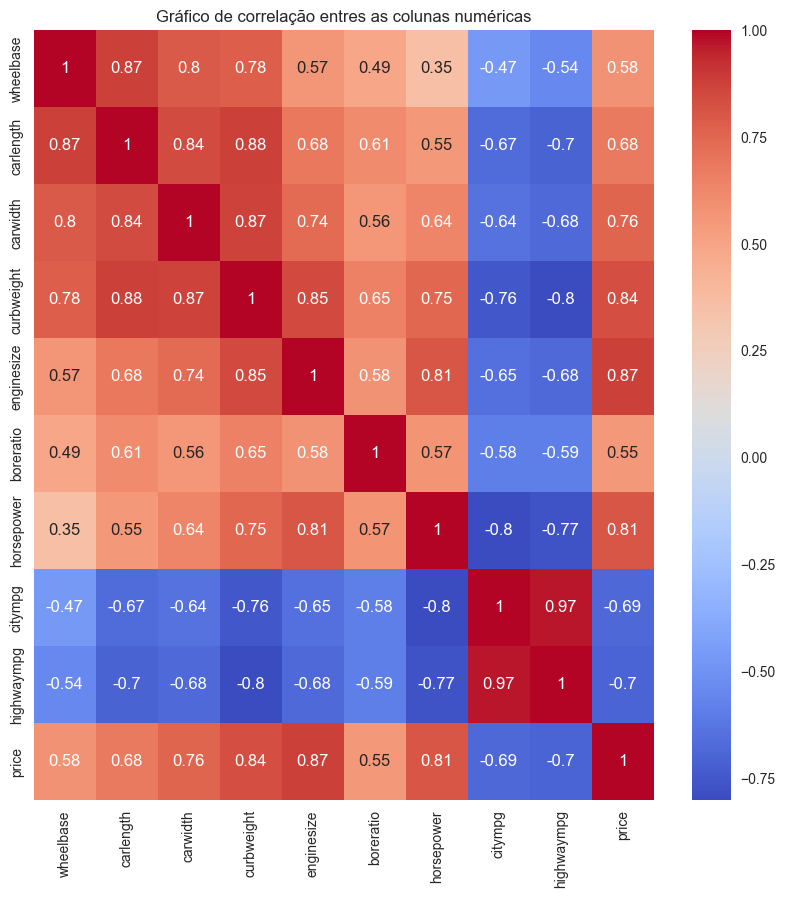

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(dados2.corr(), cmap="coolwarm", annot = True).set_title('Gráfico de correlação entres as colunas numéricas')
plt.show()

<span style="font-size:15pt;">Primeiro faremos um modelo de regressão linear mais básico, apenas pegando as 3 colunas numéricas com maior correlação com a coluna preço(curbwheight, enginesize e horsepower)</span>

In [23]:
#definição das variáveis independentes e dependentes para o primeiro de regressão(COL = ENGINESIZE, CURBWEIGHT E HORSEPOWER)
Y = dados2.iloc[: , 9].values

In [24]:
X1 = dados2.iloc[: , 6].values

In [25]:
X2 = dados2.iloc[: , 3].values

In [26]:
X3 = dados2.iloc[: , 4].values

In [27]:
#transformando os valores em matrizes
X1 = X1.reshape(-1,1)

In [28]:
X2 = X2.reshape(-1,1)

In [29]:
X3 = X3.reshape(-1,1)

In [30]:
#Juntandos todas as matrizes em uma
X = np.concatenate((X1 , X2 , X3), axis = 1)

In [31]:
#iniciando o modelo de regressão
modelo = LinearRegression()
modelo.fit(X, Y)

LinearRegression()

In [32]:
#Coeficiente de determinação (R²): representa a proporção da variabilidade dos dados dependentes que é explicada pelo modelo de regressão.
modelo.score(X, Y)

0.8138201347761838

In [33]:
previsao = modelo.predict(X)

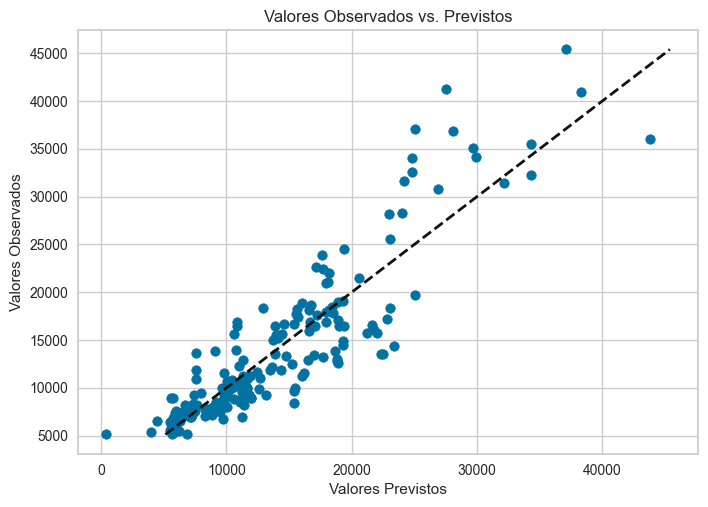

In [34]:
plt.scatter(modelo.predict(X), Y)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Observados')
plt.title('Valores Observados vs. Previstos')
plt.show()

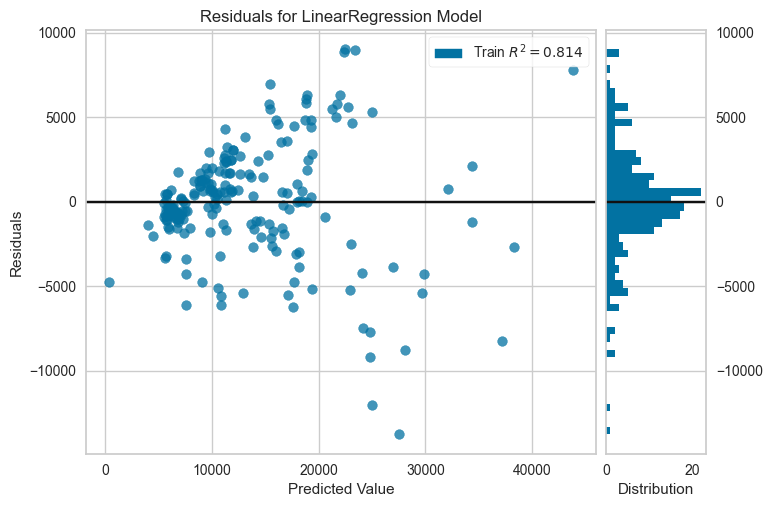

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
visualizador =  ResidualsPlot(modelo)
visualizador.fit(X,Y)
visualizador.poof()

<span style="font-size:15pt;">Podemos ver que o modelo obteve um score de 0.81, o que não é ruim mas podemos fazer melhor do que isso.</span>

In [36]:
modelo.predict([[115,2824,136]]) # previsão do preço de um audi 100ls(linha 4)

array([15723.22137477])

<span style="font-size:15pt;">A seguir utilizaremos a técnica de one-hot-encoding para podermos usar as colunas categóricas no nosso modelo de regressão</span>

In [37]:
#Selecionando as colunas categóricas e atribuindo one hot encoding ('Dummies') para transformar valores categóricos em numéricos
col_cat = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
dummies = pd.get_dummies(dados[col_cat], drop_first = True).astype(int)
dummies.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#juntando o df original com o de dummies
dados = pd.concat([dados2,dummies], axis = 1)

In [39]:
#preprocessamento dos valores númericos para a mesma escala
scaler = preprocessing.StandardScaler()

In [40]:
col_numerica = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
dados[col_numerica] = scaler.fit_transform(dados[col_numerica])

In [41]:
dados.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668,...,0,0,0,0,0,0,0,1,0,0


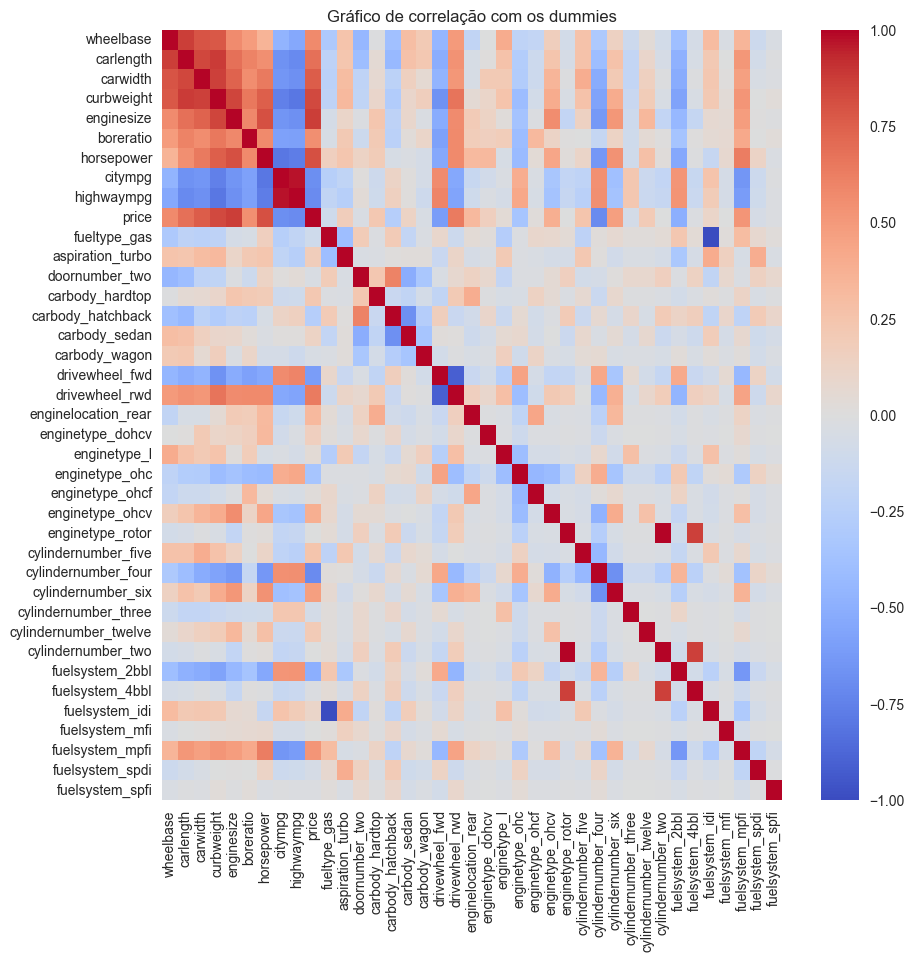

In [42]:
plt.figure(figsize = (10, 10))
sns.heatmap(dados.corr(), cmap="coolwarm").set_title('Gráfico de correlação com os dummies')
plt.show()

<span style="font-size:15pt;">Para evitar overfiting, dividiremos os dados em treino e teste para o nosso modelo</span>

In [43]:
#Dividindo o dataframe em duas amostras para treinamento e teste
dados_treinamento, dados_teste = train_test_split(dados, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
#Definindo X e y para o treinamento
y_treinamento = dados.pop('price')
X_treinamento = dados

<span style="font-size:15pt;">A seguir, utilizaremos a função RFE para nos fornecer as 15 características mais importantes para o nosso modelo de regressão</span>

In [45]:
#Criando um novo modelo com as variáveis de treinamento e usando a função RFE para pegar as 15 colunas com informações mais relevantes para o modelo de regressão
modelo2 = LinearRegression()
modelo2.fit(X_treinamento, y_treinamento)
rfe = RFE(estimator = modelo2, n_features_to_select = 15)
rfe = rfe.fit(X_treinamento, y_treinamento)

In [46]:
#colunas que foram selecionadas
col_sup = X_treinamento.columns[rfe.support_]
col_sup

Index(['curbweight', 'carbody_wagon', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_mfi', 'fuelsystem_spfi'],
      dtype='object')

In [47]:
#criando uma nova varíavel independente com as colunas escolhidas pelo RFE
X_treinamento_rfe = dados[col_sup]

In [48]:
#criando um novo modelo com essa variável
modelo2 = LinearRegression()
modelo2.fit(X_treinamento_rfe, y_treinamento)

LinearRegression()

In [49]:
#comparando as previsões com o modelo de treinamento
previsoes = modelo2.predict(X_treinamento_rfe)
modelo2.score(X_treinamento_rfe, y_treinamento)

0.8968148009306012

In [50]:
#criando a variáveis de teste
y_test = dados_teste.pop('price')
X_test = dados_teste

In [51]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_treinamento_rfe.columns]

In [52]:
# fazendo as previsões com a amostra de teste
y_pred = modelo2.predict(X_test_new)

In [53]:
# coeficiente de determinação R^2 do modelo final em relação a amostra de teste
r2_score(y_test, y_pred)

0.931983701423657

<span style="font-size:15pt;"> O novo modelo de Regressão teve um desempenho melhor do que o primeiro apresentado, além de ter ficado mais genérico para o uso de predições.</span>

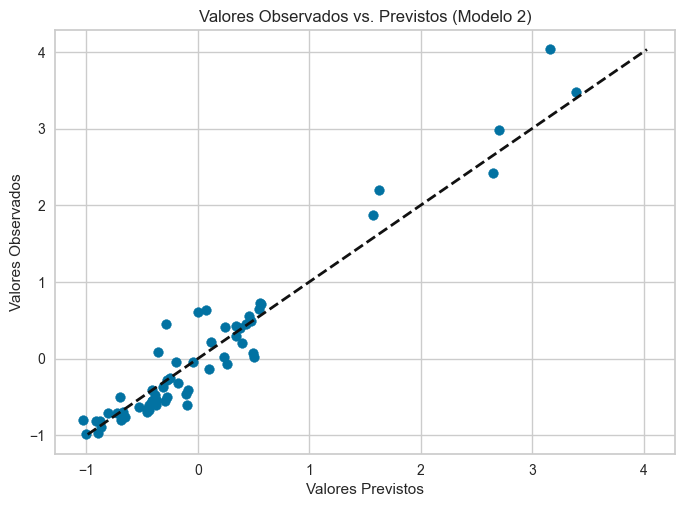

In [54]:
plt.scatter(y_pred, y_test)
# Adicionando uma linha diagonal para comparar valores previstos e observados
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Observados')
plt.title('Valores Observados vs. Previstos (Modelo 2)')
plt.show()